In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base correta
df = pd.read_csv('../data/base_cafeteria_2025.csv', encoding='utf-8')

# Conferir as primeiras linhas
print(df.head())





  Cliente_ID  Dia_do_mês  Dia_Sem Cliente_frequente Faixa_etária  Turno  \
0      C0001           1  segunda               Não        36–50  Tarde   
1      C0002           1  segunda               Não        18–25  Tarde   
2      C0003           1  segunda               Sim        18–25  Manhã   
3      C0004           1  segunda               Sim        26–35  Manhã   
4      C0005           1  segunda               Sim        26–35  Tarde   

  Forma_pagamento Promoção_no_dia Valor_da_compra_R$  
0         À vista             Não               21,5  
1         Crédito             Não              27,77  
2         À vista             Não               8,02  
3         À vista             Não              27,89  
4         À vista             Não                 40  


In [12]:
#Verificar formato de dados

# Ver primeiras linhas
print(df.head())

# Estrutura do DataFrame
print(df.info())

# Estatísticas descritivas
print(df.describe(include='all'))

# Valores nulos por coluna
print(df.isnull().sum())

# Distribuição das variáveis categóricas
print("Turno:\n", df['Turno'].value_counts(), "\n")
print("Forma de pagamento:\n", df['Forma_pagamento'].value_counts(), "\n")
print("Faixa etária:\n", df['Faixa_etária'].value_counts(), "\n")
print("Cliente frequente:\n", df['Cliente_frequente'].value_counts(), "\n")




  Cliente_ID  Dia_do_mês  Dia_Sem Cliente_frequente Faixa_etária  Turno  \
0      C0001           1  segunda               Não        36–50  Tarde   
1      C0002           1  segunda               Não        18–25  Tarde   
2      C0003           1  segunda               Sim        18–25  Manhã   
3      C0004           1  segunda               Sim        26–35  Manhã   
4      C0005           1  segunda               Sim        26–35  Tarde   

  Forma_pagamento Promoção_no_dia Valor_da_compra_R$  
0         À vista             Não               21,5  
1         Crédito             Não              27,77  
2         À vista             Não               8,02  
3         À vista             Não              27,89  
4         À vista             Não                 40  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cliente_ID    

In [14]:
#Exploração Inicial

# Trocar vírgula por ponto e converter para float
df['Valor_da_compra_R$'] = df['Valor_da_compra_R$'].str.replace(',', '.').astype(float)

# Conferir estatísticas descritivas
print(df['Valor_da_compra_R$'].describe())



count    301.000000
mean      22.840166
std        7.784490
min        7.750000
25%       17.070000
50%       21.200000
75%       27.600000
max       40.000000
Name: Valor_da_compra_R$, dtype: float64


In [15]:
#Checagem para verificar inconsistências de escritas

for col in ['Dia_Sem', 'Cliente_frequente', 'Faixa_etária', 'Turno', 'Forma_pagamento', 'Promoção_no_dia']:
    print(f"\n{col}:\n", df[col].unique())



Dia_Sem:
 ['segunda' 'terça' 'quarta' 'quinta' 'sexta' 'sábado' 'domingo']

Cliente_frequente:
 ['Não' 'Sim']

Faixa_etária:
 ['36–50' '18–25' '26–35' '51+']

Turno:
 ['Tarde' 'Manhã']

Forma_pagamento:
 ['À vista' 'Crédito']

Promoção_no_dia:
 ['Não' 'Sim']


In [16]:
#Contagem de registros por categoria (para entender a distribuição):

print(df['Dia_Sem'].value_counts())
print(df['Turno'].value_counts())
print(df['Forma_pagamento'].value_counts())


Dia_Sem
terça      55
segunda    50
sábado     44
sexta      40
quinta     40
quarta     36
domingo    36
Name: count, dtype: int64
Turno
Tarde    160
Manhã    141
Name: count, dtype: int64
Forma_pagamento
À vista    156
Crédito    145
Name: count, dtype: int64


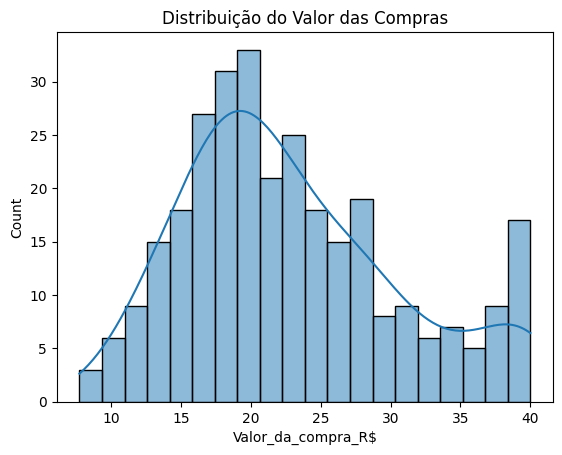

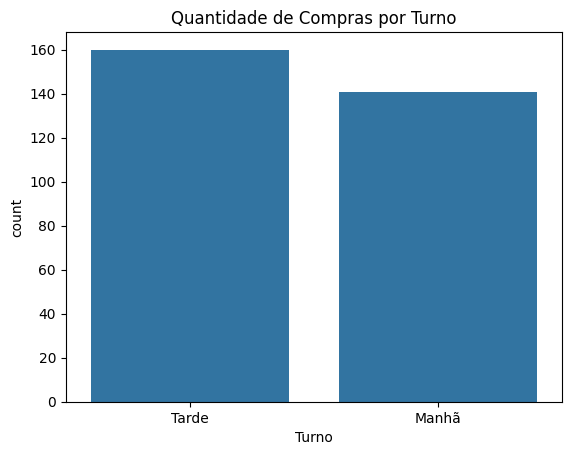

In [17]:
#Primeiros gráficos exploratórios:

import seaborn as sns
import matplotlib.pyplot as plt

# Histograma do valor das compras
sns.histplot(df['Valor_da_compra_R$'], bins=20, kde=True)
plt.title('Distribuição do Valor das Compras')
plt.show()

# Compras por turno
sns.countplot(x='Turno', data=df)
plt.title('Quantidade de Compras por Turno')
plt.show()


Dia_Sem
quarta     19.245000
sexta      21.588500
segunda    22.140600
domingo    22.931667
sábado     23.862045
terça      24.051455
quinta     25.330000
Name: Valor_da_compra_R$, dtype: float64


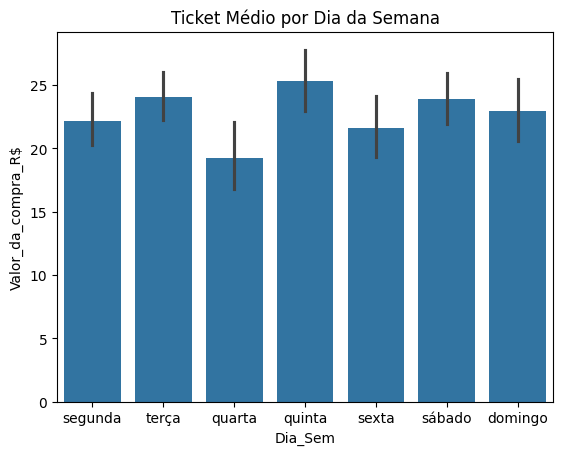

In [18]:
#Identificar padrões de consumo 
#1. Ticket médio por dia da semana

ticket_semana = df.groupby('Dia_Sem')['Valor_da_compra_R$'].mean().sort_values()
print(ticket_semana)

sns.barplot(x='Dia_Sem', y='Valor_da_compra_R$', data=df,
            order=['segunda','terça','quarta','quinta','sexta','sábado','domingo'])
plt.title('Ticket Médio por Dia da Semana')
plt.show()


Turno
Manhã    21.594113
Tarde    23.938250
Name: Valor_da_compra_R$, dtype: float64


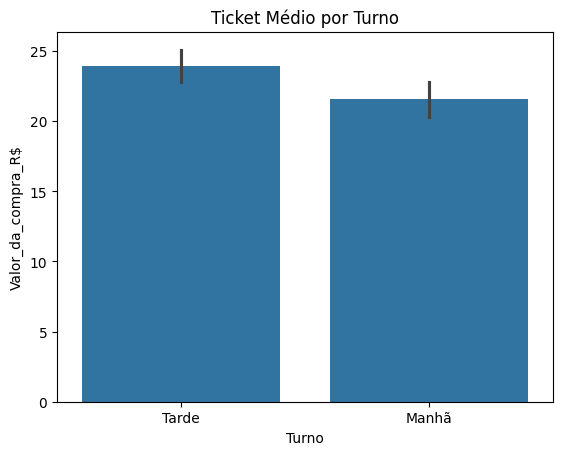

In [19]:
#2. Ticket médio por turno

ticket_turno = df.groupby('Turno')['Valor_da_compra_R$'].mean()
print(ticket_turno)

sns.barplot(x='Turno', y='Valor_da_compra_R$', data=df)
plt.title('Ticket Médio por Turno')
plt.show()


Promoção_no_dia
Não    22.033301
Sim    24.589789
Name: Valor_da_compra_R$, dtype: float64


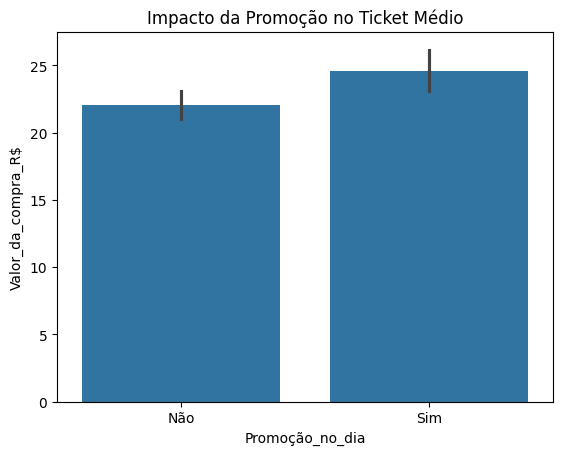

In [20]:
# 3. Ticket médio com vs. sem promoção

ticket_promo = df.groupby('Promoção_no_dia')['Valor_da_compra_R$'].mean()
print(ticket_promo)

sns.barplot(x='Promoção_no_dia', y='Valor_da_compra_R$', data=df)
plt.title('Impacto da Promoção no Ticket Médio')
plt.show()


Cliente_frequente
Não    21.699545
Sim    24.446160
Name: Valor_da_compra_R$, dtype: float64


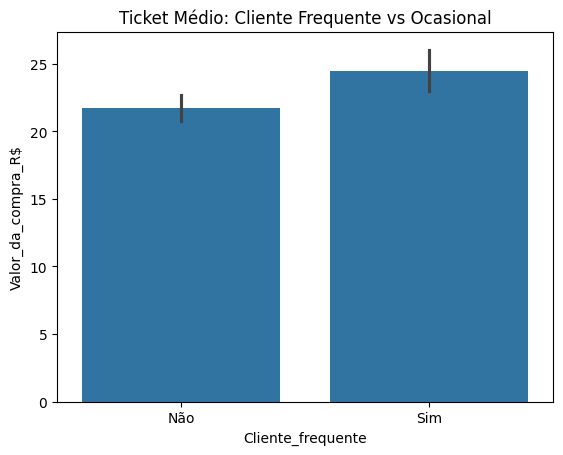

In [21]:
# 4. Ticket médio por cliente frequente

ticket_freq = df.groupby('Cliente_frequente')['Valor_da_compra_R$'].mean()
print(ticket_freq)

sns.barplot(x='Cliente_frequente', y='Valor_da_compra_R$', data=df)
plt.title('Ticket Médio: Cliente Frequente vs Ocasional')
plt.show()


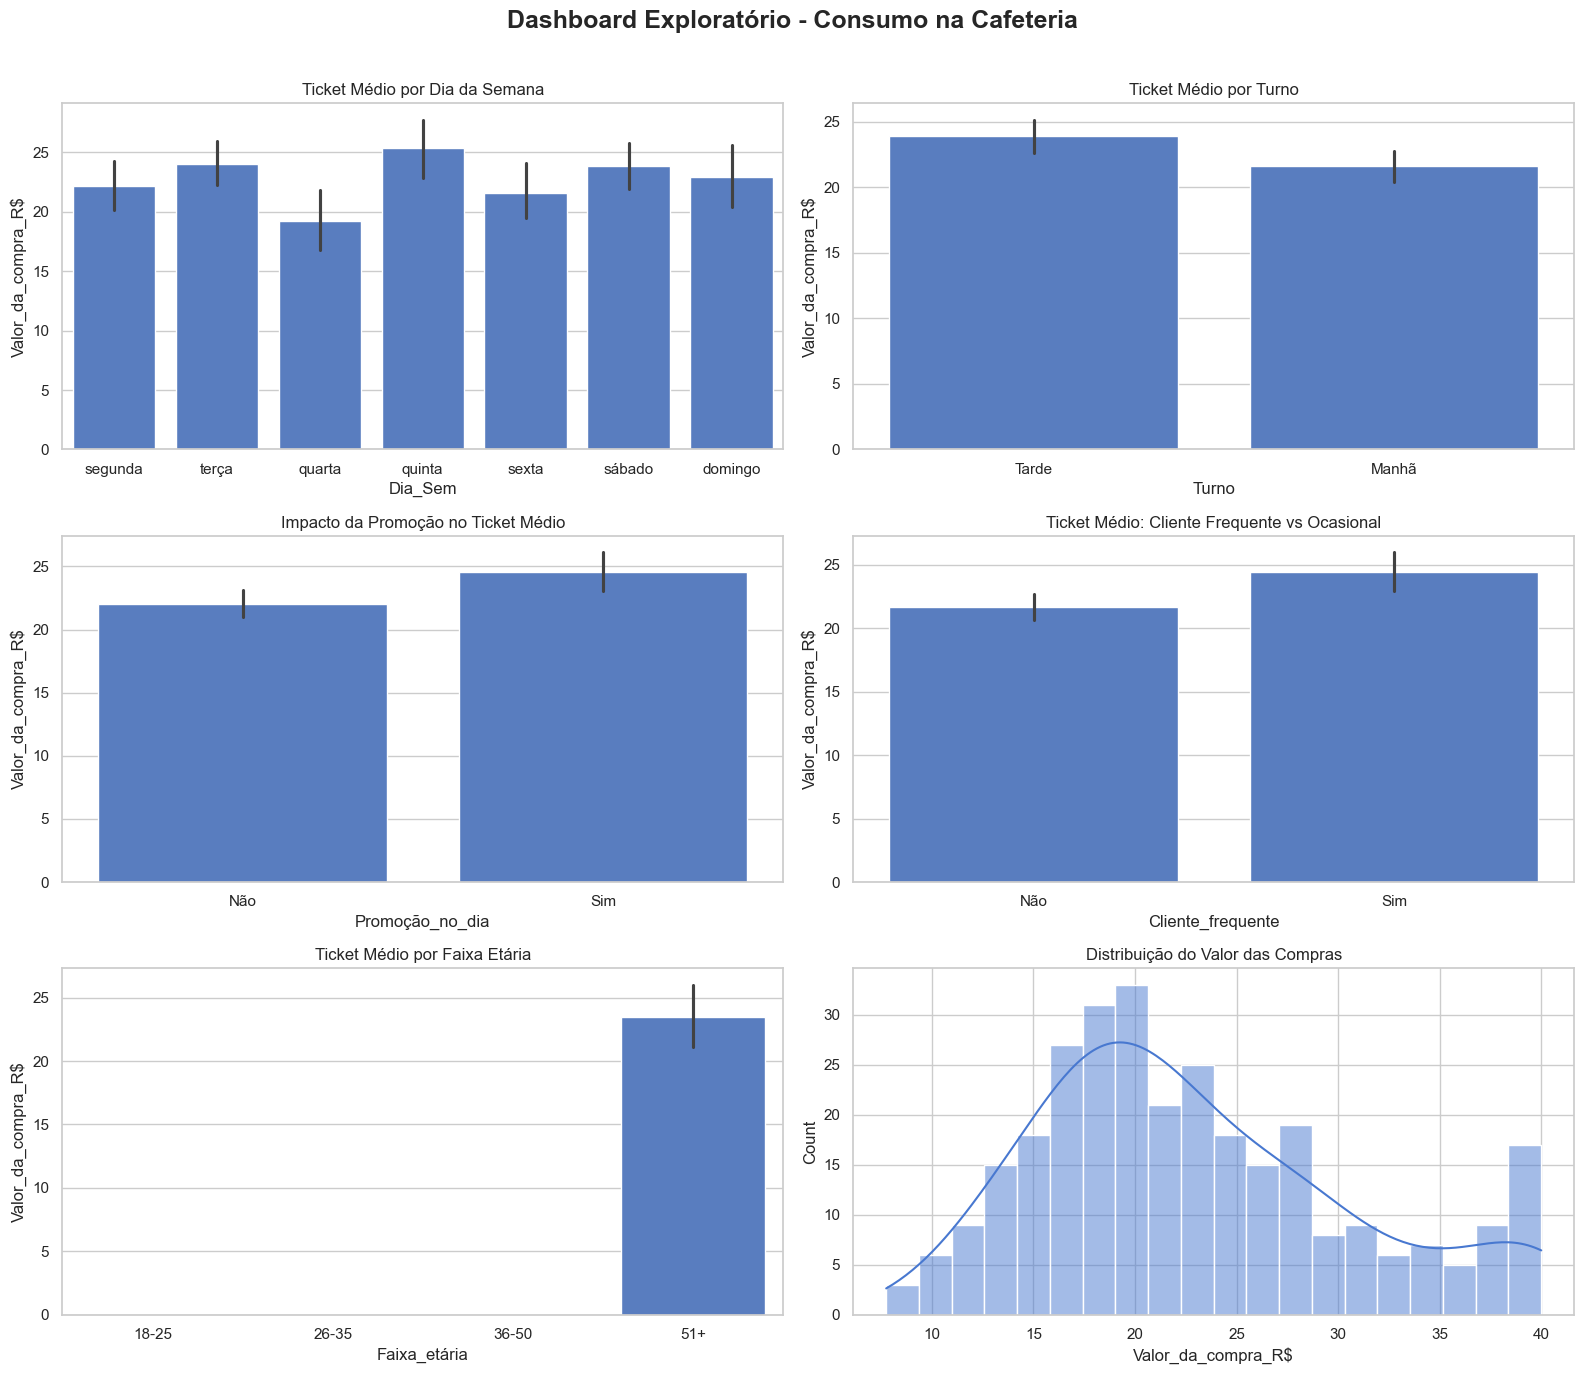

In [22]:
# Dashboard Exploratório 

import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo
sns.set(style="whitegrid", palette="muted")

# Criar figura com subplots (3 linhas x 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Dashboard Exploratório - Consumo na Cafeteria", fontsize=18, fontweight="bold")

# 1. Ticket médio por dia da semana
sns.barplot(x='Dia_Sem', y='Valor_da_compra_R$', data=df,
            order=['segunda','terça','quarta','quinta','sexta','sábado','domingo'],
            ax=axes[0,0])
axes[0,0].set_title("Ticket Médio por Dia da Semana")

# 2. Ticket médio por turno
sns.barplot(x='Turno', y='Valor_da_compra_R$', data=df, ax=axes[0,1])
axes[0,1].set_title("Ticket Médio por Turno")

# 3. Ticket médio com vs. sem promoção
sns.barplot(x='Promoção_no_dia', y='Valor_da_compra_R$', data=df, ax=axes[1,0])
axes[1,0].set_title("Impacto da Promoção no Ticket Médio")

# 4. Ticket médio por cliente frequente
sns.barplot(x='Cliente_frequente', y='Valor_da_compra_R$', data=df, ax=axes[1,1])
axes[1,1].set_title("Ticket Médio: Cliente Frequente vs Ocasional")

# 5. Ticket médio por faixa etária
sns.barplot(x='Faixa_etária', y='Valor_da_compra_R$', data=df,
            order=['18-25','26-35','36-50','51+'],
            ax=axes[2,0])
axes[2,0].set_title("Ticket Médio por Faixa Etária")

# 6. Distribuição do valor das compras (histograma)
sns.histplot(df['Valor_da_compra_R$'], bins=20, kde=True, ax=axes[2,1])
axes[2,1].set_title("Distribuição do Valor das Compras")

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


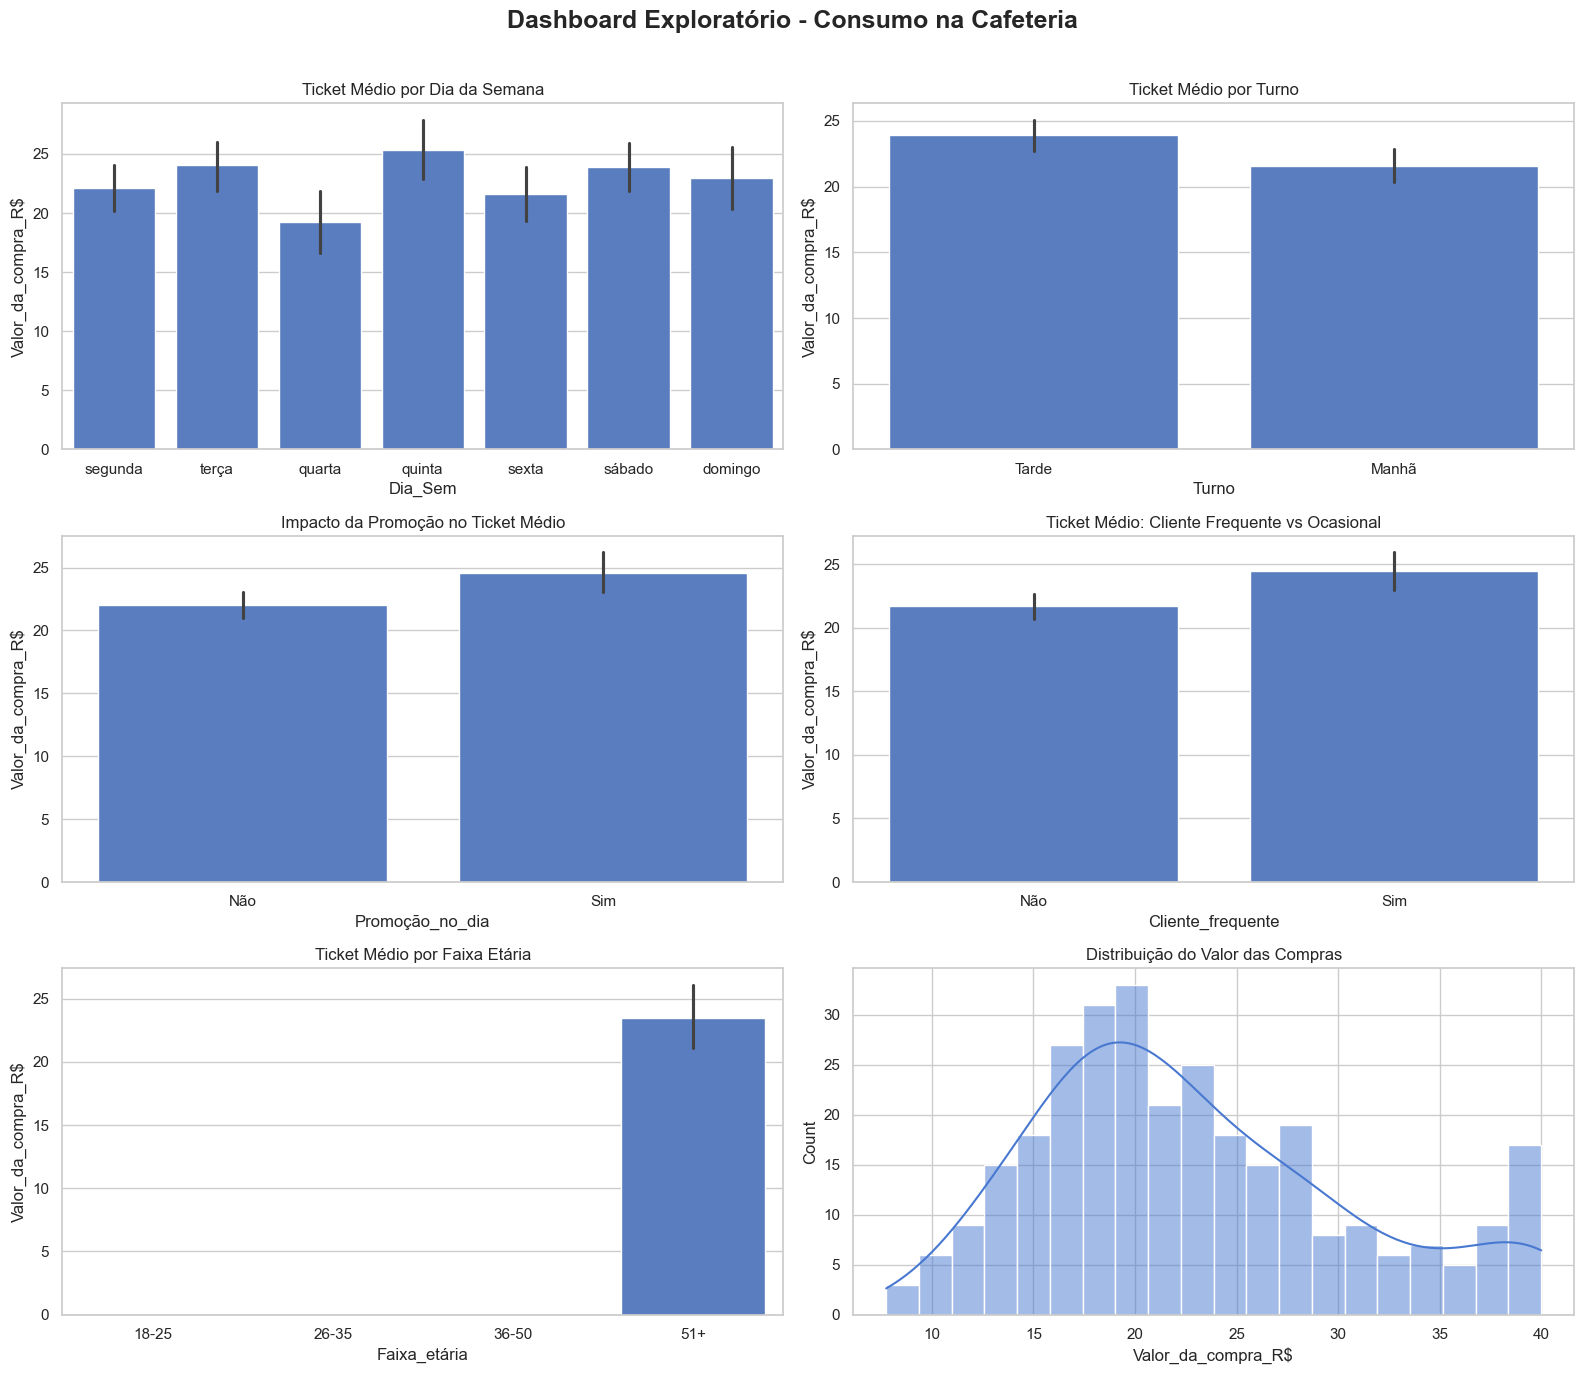

In [24]:
#Script Final — Dashboard + Gráficos Individuais

import os
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que a pasta dashboard existe
os.makedirs('./dashboard', exist_ok=True)

# Ajustar estilo
sns.set(style="whitegrid", palette="muted")

# ---------- GRÁFICOS INDIVIDUAIS ----------

# 1. Ticket médio por dia da semana
plt.figure(figsize=(8,5))
sns.barplot(x='Dia_Sem', y='Valor_da_compra_R$', data=df,
            order=['segunda','terça','quarta','quinta','sexta','sábado','domingo'])
plt.title("Ticket Médio por Dia da Semana")
plt.savefig('./dashboard/ticket_semana.png', dpi=300)
plt.close()

# 2. Ticket médio por turno
plt.figure(figsize=(6,4))
sns.barplot(x='Turno', y='Valor_da_compra_R$', data=df)
plt.title("Ticket Médio por Turno")
plt.savefig('./dashboard/ticket_turno.png', dpi=300)
plt.close()

# 3. Ticket médio com vs. sem promoção
plt.figure(figsize=(6,4))
sns.barplot(x='Promoção_no_dia', y='Valor_da_compra_R$', data=df)
plt.title("Impacto da Promoção no Ticket Médio")
plt.savefig('./dashboard/ticket_promocao.png', dpi=300)
plt.close()

# 4. Ticket médio por cliente frequente
plt.figure(figsize=(6,4))
sns.barplot(x='Cliente_frequente', y='Valor_da_compra_R$', data=df)
plt.title("Ticket Médio: Cliente Frequente vs Ocasional")
plt.savefig('./dashboard/ticket_frequencia.png', dpi=300)
plt.close()

# 5. Ticket médio por faixa etária
plt.figure(figsize=(8,5))
sns.barplot(x='Faixa_etária', y='Valor_da_compra_R$', data=df,
            order=['18-25','26-35','36-50','51+'])
plt.title("Ticket Médio por Faixa Etária")
plt.savefig('./dashboard/ticket_idade.png', dpi=300)
plt.close()

# 6. Distribuição do valor das compras
plt.figure(figsize=(8,5))
sns.histplot(df['Valor_da_compra_R$'], bins=20, kde=True)
plt.title("Distribuição do Valor das Compras")
plt.savefig('./dashboard/distribuicao_valores.png', dpi=300)
plt.close()

# ---------- DASHBOARD COMPLETO ----------
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Dashboard Exploratório - Consumo na Cafeteria", fontsize=18, fontweight="bold")

sns.barplot(x='Dia_Sem', y='Valor_da_compra_R$', data=df,
            order=['segunda','terça','quarta','quinta','sexta','sábado','domingo'],
            ax=axes[0,0])
axes[0,0].set_title("Ticket Médio por Dia da Semana")

sns.barplot(x='Turno', y='Valor_da_compra_R$', data=df, ax=axes[0,1])
axes[0,1].set_title("Ticket Médio por Turno")

sns.barplot(x='Promoção_no_dia', y='Valor_da_compra_R$', data=df, ax=axes[1,0])
axes[1,0].set_title("Impacto da Promoção no Ticket Médio")

sns.barplot(x='Cliente_frequente', y='Valor_da_compra_R$', data=df, ax=axes[1,1])
axes[1,1].set_title("Ticket Médio: Cliente Frequente vs Ocasional")

sns.barplot(x='Faixa_etária', y='Valor_da_compra_R$', data=df,
            order=['18-25','26-35','36-50','51+'],
            ax=axes[2,0])
axes[2,0].set_title("Ticket Médio por Faixa Etária")

sns.histplot(df['Valor_da_compra_R$'], bins=20, kde=True, ax=axes[2,1])
axes[2,1].set_title("Distribuição do Valor das Compras")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('./dashboard/dashboard_exploratorio.png', dpi=300)
plt.show()
